In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
from tqdm.keras import TqdmCallback

import matplotlib.pyplot as plt

# Convolutional Neural Network's Architecture

In [2]:
model = models.Sequential()

# Conv1

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-5), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv 2

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv 3

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

# Conv 3

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.25))

# Flatten Layer

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

# Output Layer

model.add(Dense(1, activation='sigmoid'))

2022-11-09 04:10:12.113474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 04:10:12.114516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 04:10:12.301991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 04:10:12.303035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-09 04:10:12.303949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0

# Data Augmentation

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
train_generator = train_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Training

In [7]:
checkpoint = ModelCheckpoint('best.hdf5',monitor='val_accuracy', verbose= 0, save_best_only=True)

In [8]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [9]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 verbose=0,
                 callbacks=[checkpoint, TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-11-09 04:10:17.702502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-09 04:10:20.411989: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


# Results

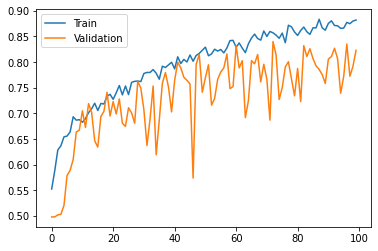

In [10]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150, 150),
                                 batch_size=64,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [12]:
best_model = model
best_model.load_weights('./best.hdf5')

In [13]:
best_model.evaluate(test_generator)

16/16 [==============================] - 6s 379ms/step - loss: 0.4617 - accuracy: 0.8170


[0.4616546928882599, 0.8169999718666077]